## Simon's Algorithm, 3-qubit case

### 1. Initialize

In [16]:
from funcs import *
from qiskit.circuit.library import MCXGate
from qiskit import ClassicalRegister
import numpy as np
import random

In [17]:
# set data

f_dict = {'000': '101', '001': '010', '010': '000', '011': '110', '100': '000', '101': '110', '110': '101', '111': '010'}

### 2.Map the circuit

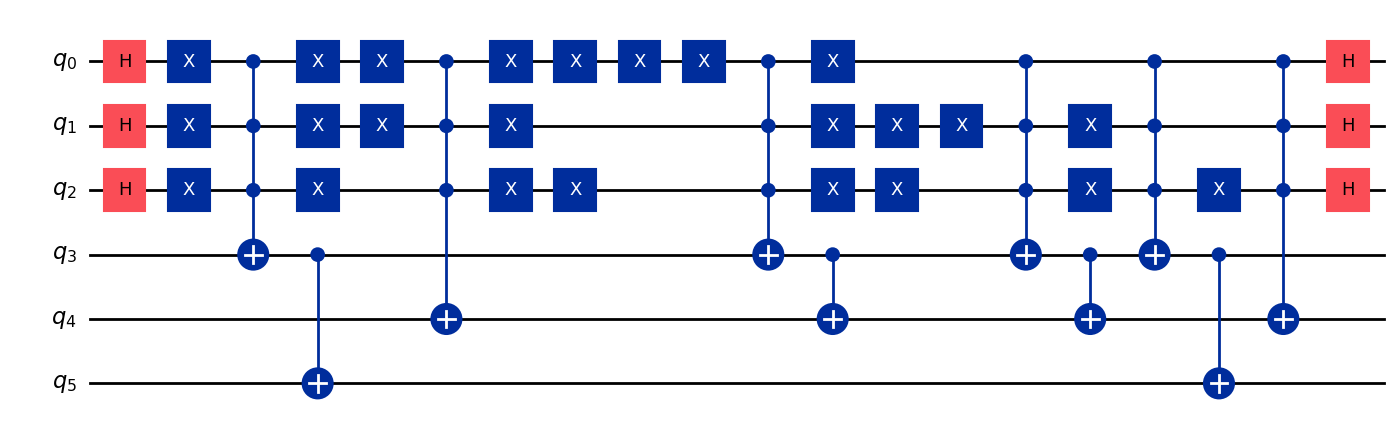

In [18]:
qc = QuantumCircuit(6)
gate = MCXGate(3)
for i in range(3):
    qc.h(i)

def sing_mul_oracle(qc, x, y):
    for i in range(3):
        if x[i]=='0':
            qc.x(i)
    if y =='001':
        qc.append(gate, [0,1,2,5]) 
    elif y =='010':
        qc.append(gate, [0,1,2,4])
    elif y =='100':
        qc.append(gate, [0,1,2,3])
    elif y =='011':
        qc.append(gate, [0,1,2,4])
        qc.cx(4, 5)
    elif y == '101':
        qc.append(gate, [0,1,2,3])
        qc.cx(3, 5)
    elif y == '110':
        qc.append(gate, [0,1,2,3])
        qc.cx(3, 4)
    elif y == '111':
        qc.append(gate, [0,1,2,3])
        qc.cx(3, 4)
        qc.cx(4, 5)
    for i in range(3):
        if x[i]=='0':
            qc.x(i)
    return qc

def mul_oracle(qc, f_dict):
    for key, value in f_dict.items():
        qc = sing_mul_oracle(qc, key, value)
    return qc

qc = mul_oracle(qc, f_dict=f_dict)

for i in range(3):
    qc.h(i)
    
qc.draw(output='mpl')

### 3.Transpile and Measure

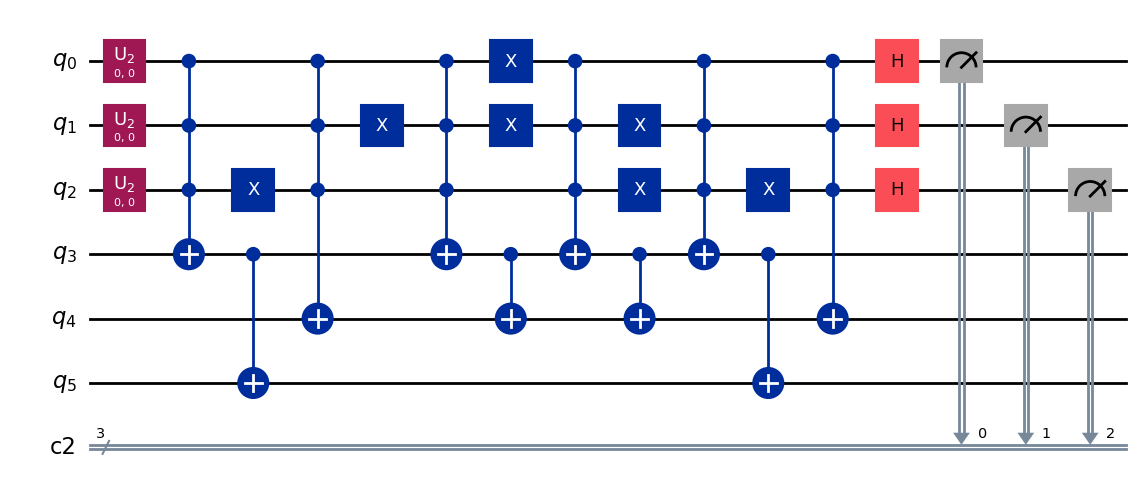

In [19]:
qc = transpile(qc, backend=AerSimulator(), optimization_level=2)

c = ClassicalRegister(3)
qc.add_register(c)
for i in range(3):
    qc.measure(i, c[i])

qc.draw(output='mpl')

### 4.Execute and Process Results

In [20]:
results = execute_qc(qc)
print(results)

{'000': 203, '111': 220, '011': 160, '100': 161, '010': 99, '101': 101, '001': 40, '110': 40}


In [21]:
res_vecs = []
for key,_ in results.items():
    res_vec = [int(char) for char in key]
    res_vecs.append(res_vec)
res_array = np.array(res_vecs)
print(res_array)

[[0 0 0]
 [1 1 1]
 [0 1 1]
 [1 0 0]
 [0 1 0]
 [1 0 1]
 [0 0 1]
 [1 1 0]]


### 5.Solve Linear Equations

In [29]:
# solver (mod 2)
def solver(A, b):
    try:  
        x = np.linalg.solve(A, b)  
    except np.linalg.LinAlgError:  
        return np.array([-1, 0, 0], dtype=np.int8)
    x_mod2 = x % 2    
    return x_mod2.astype(np.int8)

x = [-1, 0, 0]
b = np.array([0, 0, 0], dtype=np.int8)
while(x[0] == -1 or sum(x) == 0):
    rand_nums = random.sample(range(0, 8), 3)
    A = [res_array[r] for r in rand_nums]
    A = np.array(A, dtype=np.int8)
    x = solver(A, b)
print(x)

KeyboardInterrupt: 